In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [87]:
data = pd.read_csv('wine_data.csv')
data.head()

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


In [88]:
data.shape

(178, 2)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OD_read  178 non-null    float64
 1   Proline  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


In [90]:
data.describe()

,OD_read,Proline
count,178.000000,178.000000
mean,2.611685,746.893258
std,0.709990,314.907474
min,1.270000,278.000000
25%,1.937500,500.500000
50%,2.780000,673.500000
75%,3.170000,985.000000
max,4.000000,1680.000000


In [91]:
data.isna().sum()

OD_read    0
Proline    0
dtype: int64

In [155]:
data = data.drop_duplicates()
data.duplicated().sum()

0

<AxesSubplot:ylabel='count'>

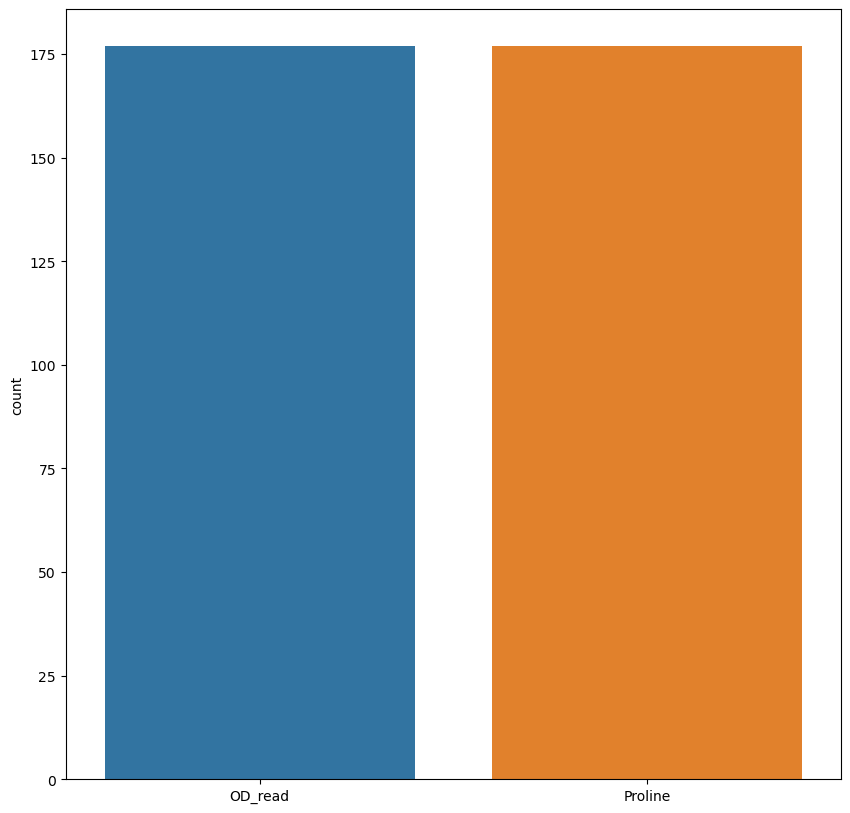

In [189]:
plt.figure(figsize=(10,10))
sns.countplot(data)

<AxesSubplot:xlabel='OD_read', ylabel='Proline'>

<Figure size 1000x1000 with 0 Axes>

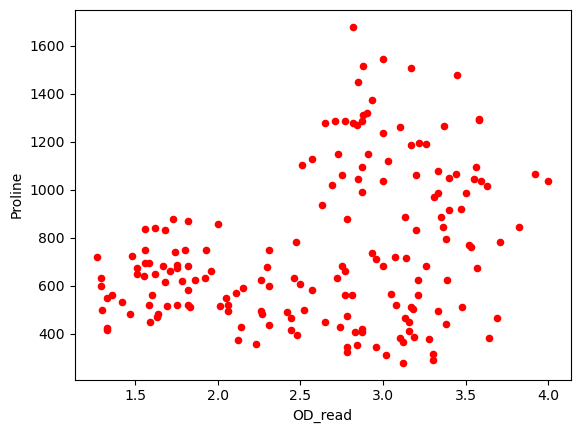

In [156]:
plt.figure(figsize=(10,10))
data.plot(kind='scatter',x='OD_read',y='Proline',c='r')

In [187]:
corr = data.corr()

<AxesSubplot:>

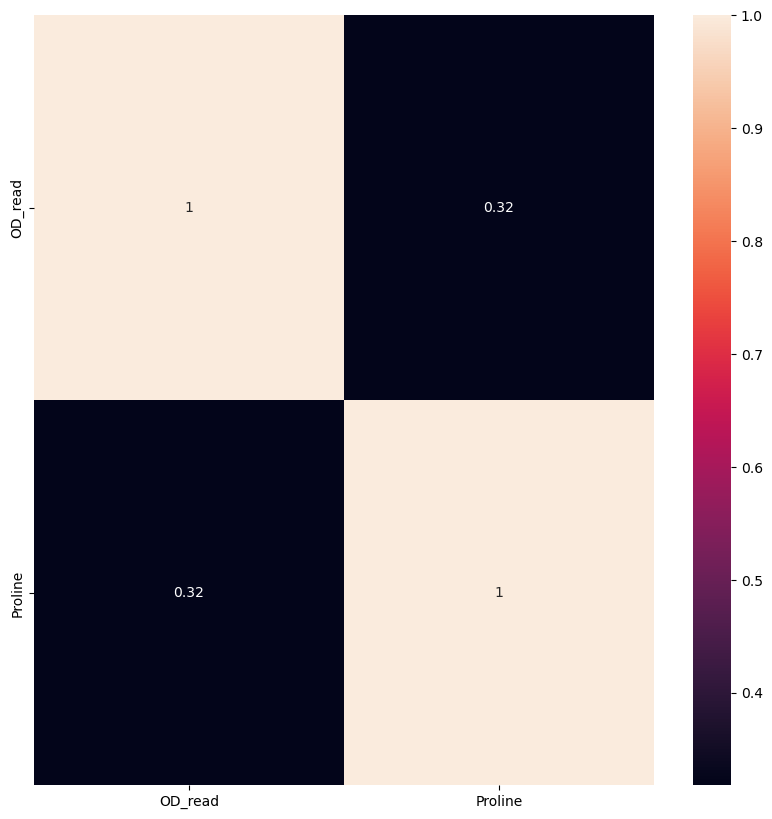

In [188]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [220]:
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
db = DBSCAN(eps=59,min_samples=18)
model = db.fit_predict(data)
silhouette_score(data,model)

0.625546071006463

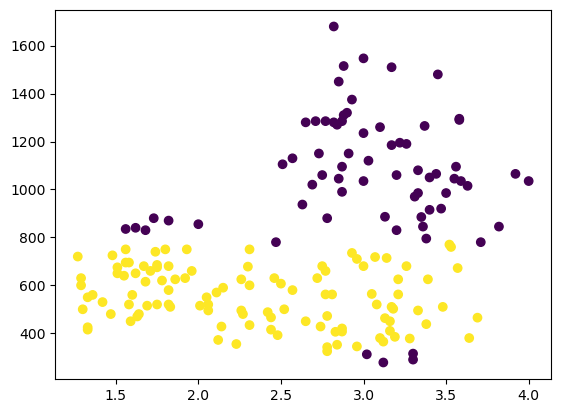

In [159]:
plt.scatter(data['OD_read'], data['Proline'], c = model) # plotting the clusters
plt.show()

In [174]:
k=KMeans(2)
d = k.fit_predict(data)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\satya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [175]:
silhouette_score(data,d)

0.6607102859339475

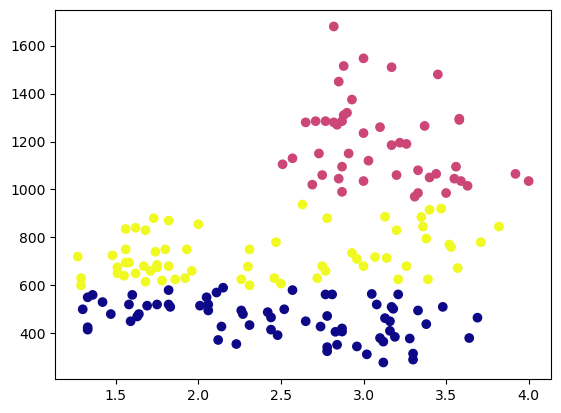

In [176]:
plt.scatter(data['OD_read'], data['Proline'], c = labels, cmap= "plasma") # plotting the clusters
plt.show()

In [178]:
ag = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [181]:
final = ag.fit_predict(data)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [182]:
silhouette_score(data,final)

0.6609308964144763

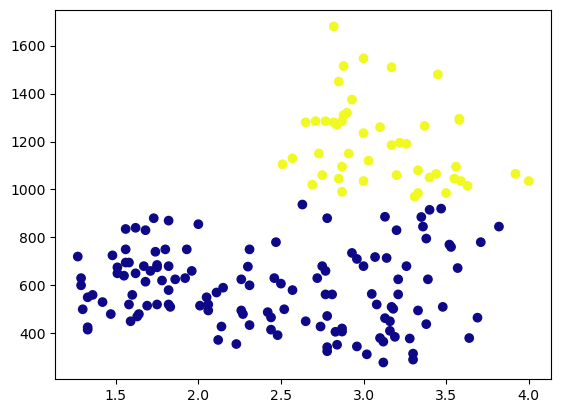

In [183]:
plt.scatter(data['OD_read'], data['Proline'], c = final, cmap= "plasma") # plotting the clusters
plt.show()